<a href="https://colab.research.google.com/github/TOBECHI-GH/Formation_Evaluation/blob/main/Copy_of_session3_formation_evaluation_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formation Evaluation with Python

In [48]:
# import numpy, matplotlib, and pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [49]:
# install and import lasio
!pip install lasio
import lasio


In [4]:
# cloning github repository of formation-evaluation
!git clone https://github.com/yohanesnuwara/formation-evaluation

# import system
import sys
sys.path.append('/content/formation-evaluation')

Cloning into 'formation-evaluation'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 105 (delta 45), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (105/105), 8.03 MiB | 2.98 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [5]:
# import all functions from formation-evaluation
from label_generator import label_generator
from triple_combo import triple_combo
from ND_plot import ND_plot
from well_log_display import well_log_display


## Functions

In [6]:
def calculate_klogh(formation_name, phif, vsh):
  # there is no available equation for Heather Fm. 
  if formation_name == 'hugin':
    return 10 ** (2 + (8 * phif) - (9 * vsh))
  if formation_name == 'sleipner':
    return 10 ** (-3 + (32 * phif) - (2 * vsh))
  if formation_name == 'skagerak':
    return 10 ** (-1.85 + (17.4 * phif) - (3 * vsh))

## Load well log data

In [7]:
# specify file path (well 15/9-F-11A)
filepath = '/content/formation-evaluation/data/volve/15_9-F-11A.LAS'


# read with lasio
well = lasio.read(filepath)



In [8]:
# check the available logs with .keys()
well.keys()


['DEPTH',
 'ABDCQF01',
 'ABDCQF02',
 'ABDCQF03',
 'ABDCQF04',
 'BS',
 'CALI',
 'DRHO',
 'DT',
 'DTS',
 'GR',
 'NPHI',
 'PEF',
 'RACEHM',
 'RACELM',
 'RD',
 'RHOB',
 'RM',
 'ROP',
 'RPCEHM',
 'RPCELM',
 'RT']

In [9]:
# look for more detail with .curves
well.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="00 001 00 00", descr="0  Depth", original_mnemonic="DEPTH", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF01", unit="g/cm3", value="00 000 00 00:   1  ABDCQF01:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF01", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF02", unit="g/cm3", value="00 000 00 00:   2  ABDCQF02:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF02", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF03", unit="g/cm3", value="00 000 00 00:   3  ABDCQF03:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF03", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF04", unit="g/cm3", value="00 000 00 00:   4  ABDCQF04:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF04", data.shape=(35735,)),
 CurveItem(mnemonic="BS", unit="inches", value="00 000 00 00:   5  BS:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="BS", data.shape=(35735,)),
 CurveItem(mnemonic="CALI", unit="inches", value="70 280 00 01: 

In [10]:
# see the data using .data
well.data


array([[ 188.5,    nan,    nan, ...,    nan,    nan,    nan],
       [ 188.6,    nan,    nan, ...,    nan,    nan,    nan],
       [ 188.7,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [3761.7,    nan,    nan, ...,    nan,    nan,    nan],
       [3761.8,    nan,    nan, ...,    nan,    nan,    nan],
       [3761.9,    nan,    nan, ...,    nan,    nan,    nan]])

In [11]:
# convert it to Pandas dataframe using .df() and then reset index
well = well.df().reset_index()



In [12]:
# then show the dataframe
well

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,3761.5,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.738,NaN,NaN,NaN
35731,3761.6,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.751,NaN,NaN,NaN
35732,3761.7,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.764,NaN,NaN,NaN
35733,3761.8,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.757,NaN,NaN,NaN


## Generate formation labels from formation tops file

We have formation tops file. What we are going to do now is to give formation top labels to the logs. We'll use function `label_generator`.

In [13]:
# specify file path
filepath = '/content/formation-evaluation/data/volve/Fmtops_15_9-F-11A.csv'

# read with Pandas
tops = pd.read_csv(filepath)

tops



,PICKS,DEPTH
0,HORDALAND GP. Top,2600.0
1,Ty Fm. Top,2624.0
2,Ekofisk Fm. Top,2794.5
3,Hod Fm. Top,3118.0
4,Draupne Fm. Top,3525.8
5,Heather Fm. Top,3574.9
6,Heather Fm. Sand VOLVE Top,3585.2
7,Hugin Fm. VOLVE Top,3594.6
8,Sleipner Fm. Top,3702.0


the function we want to use is "label_generator"

In [14]:
# see help to find what inputs to the function are required
help(label_generator)

Help on function label_generator in module label_generator:

label_generator(df_well, df_tops, column_depth, label_name)
    Generate Formation (or other) Labels to Well Dataframe
    (useful for machine learning and EDA purpose)
    
    Input:
    
    df_well is your well dataframe (that originally doesn't have the intended label)
    df_tops is your label dataframe (this dataframe should ONLY have 2 columns)
      1st column is the label name (e.g. formation top names)
      2nd column is the depth of each label name
    
    column_depth is the name of depth column on your df_well dataframe
    label_name is the name of label that you want to produce (e.g. FM. LABEL)
    
    Output:
    
    df_well is your dataframe that now has the labels (e.g. FM. LABEL)



In [15]:
# use "label_generator" to generate formation labels
# then show the dataframe
df_well = well
df_tops = tops
column_depth = 'DEPTH'
label_name = 'FM.LABEL'

well = label_generator(df_well, df_tops, column_depth, label_name)

well


,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FM.LABEL
0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,3761.5,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.738,0.741,0.737,0.77,Sleipner Fm. Top
35731,3761.6,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.751,0.741,0.737,0.77,Sleipner Fm. Top
35732,3761.7,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.764,0.741,0.737,0.77,Sleipner Fm. Top
35733,3761.8,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.757,0.741,0.737,0.77,Sleipner Fm. Top


As we see here we have NaN in the `FM. LABEL` column simply because the depths are not corresponding to any Fm. tops. So we can replace NaNs with a string named as `Unknown`

In [16]:
# Replace NaNs in formation label column with string called "Unknown"
well['FM.LABEL'] = well['FM.LABEL'].fillna('Unknown')

well

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FM.LABEL
0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,3761.5,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.738,0.741,0.737,0.77,Sleipner Fm. Top
35731,3761.6,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.751,0.741,0.737,0.77,Sleipner Fm. Top
35732,3761.7,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.764,0.741,0.737,0.77,Sleipner Fm. Top
35733,3761.8,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.757,0.741,0.737,0.77,Sleipner Fm. Top


## Visualize

### Well-log visualization

We will use function `well_log_display`

In [17]:
# see help to find what visualization inputs are required
# identify which input is OBLIGATORY, which input is OPTIONAL
help(well_log_display)

Help on function well_log_display in module well_log_display:

well_log_display(df, column_depth, column_list, column_semilog=None, min_depth=None, max_depth=None, column_min=None, column_max=None, colors=None, fm_tops=None, fm_depths=None, tight_layout=1, title_size=10)
    Display log side-by-side style
    Input:
    df is your dataframe
    specify min_depth and max_depth as the upper and lower depth limit
    column_depth is the column name of your depth
    column_list is the LIST of column names that you will display
    
    column_semilog is specific for resistivity column; if your resistivities are 
      in column 3, specify as: column_semilog=2. Default is None, so if you don't 
      specify, the resistivity will be plotted in normal axis instead
      
    column_min is list of minimum values for the x-axes.
    column_max is list of maximum values for the x-axes.
    
    colors is the list of colors specified for each log names. Default is None,
      so if don't specif

Use default

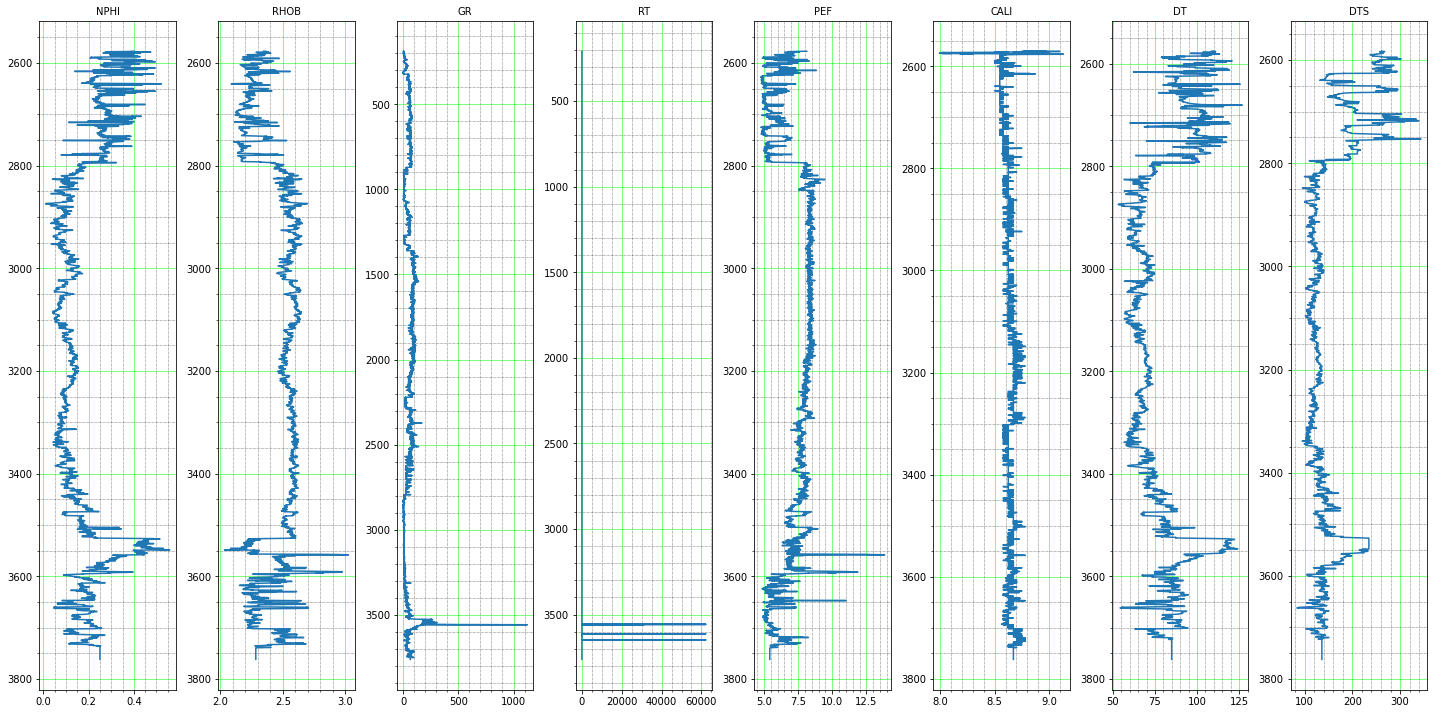

In [18]:
# Logs we gonna visualize are: 'NPHI', 'RHOB', 'GR', 'RT' , 'PEF', 'CALI', 'DT', 'DTS'
df = well
column_depth = 'DEPTH'
column_list = ['NPHI', 'RHOB', 'GR', 'RT' , 'PEF', 'CALI', 'DT', 'DTS']

well_log_display(df, column_depth, column_list)

Make the visualization looks better (adding the optional variables)

* Transform the resistivity axis from Cartesian axis to Semilog axis
* Give limits to the x and depth axes
* Give different colors to each log

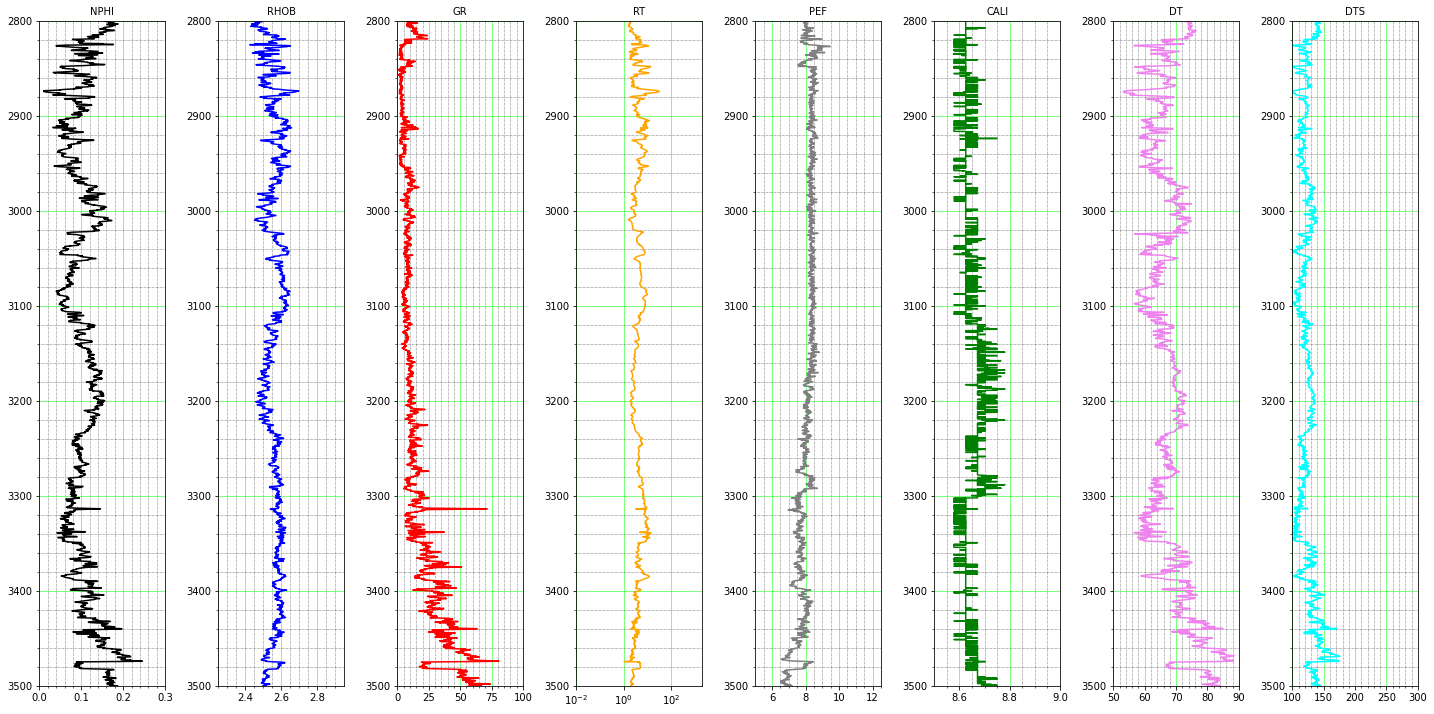

In [19]:
# adding optional variables like "min_depth", "max_depth", etc.
df = well
column_depth = 'DEPTH'
column_list = ['NPHI', 'RHOB', 'GR', 'RT' , 'PEF', 'CALI', 'DT', 'DTS']

column_semilog=3
min_depth=2800
max_depth=3500
column_min=[0, 2.25, 0, 0.01 , 5, 8.5, 50, 100]
column_max=[0.3, 2.95, 100, 2000 , 12.5, 9, 90, 300]
colors=['black', 'blue', 'red', 'orange' , 'grey', 'green', 'violet', 'cyan']

well_log_display(df, column_depth, column_list, column_semilog, min_depth, max_depth, column_min, column_max, colors)

### Triple combo

We are seeking hydrocarbon occurence in depth between 3,580 to 3,702 m. So, we'll visualize the crossover in a triple combo. We will use function `triple_combo`

In [20]:
# see help to find what visualization inputs are required
# identify which input is OBLIGATORY, which input is OPTIONAL
help(triple_combo)

Help on function triple_combo in module triple_combo:

triple_combo(df, column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB, min_depth, max_depth, min_GR=0, max_GR=150, sand_GR_line=60, min_resistivity=0.01, max_resistivity=1000, color_GR='black', color_resistivity='green', color_RHOB='red', color_NPHI='blue', figsize=(6, 10), tight_layout=1, title_size=15, title_height=1.05)
    Producing Triple Combo log
    
    Input:
    
    df is your dataframe
    column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB
    are column names that appear in your dataframe (originally from the LAS file)
    
    specify your depth limits; min_depth and max_depth
    
    input variables other than above are default. You can specify
    the values yourselves. 
    
    Output:
    
    Fill colors; gold (sand), lime green (non-sand), blue (water-zone), orange (HC-zone)



Use default

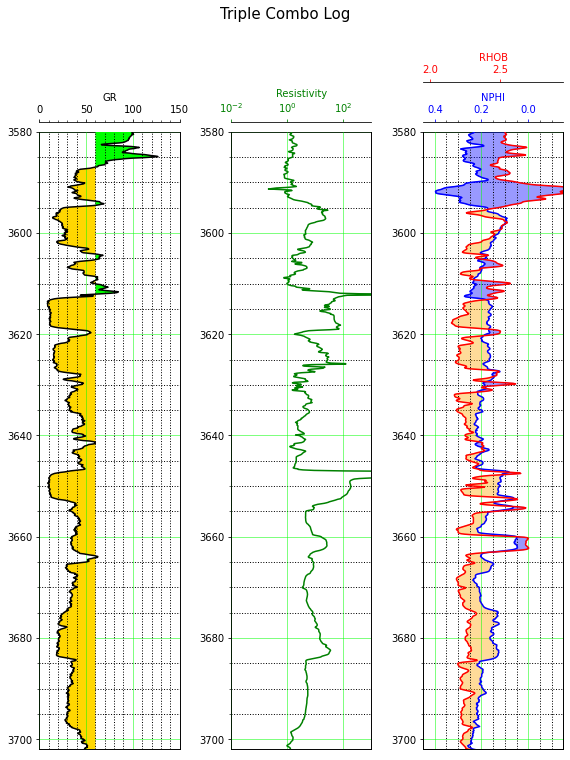

In [21]:
# triple combo at depth from 3,580 to 3,702 m
df = well
column_depth = 'DEPTH'
column_GR = 'GR'
column_resistivity ='RT'
column_NPHI ='NPHI'
column_RHOB ='RHOB'
min_depth =3580
max_depth =3702

triple_combo(df, column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB, min_depth, max_depth)

Make the visualization looks better (adding the optional variables)

* Give limits to the x axes (specifically, GR and resistivity)
* Give a sand GR line, e.g. 50 API
* Adjust figure size and title height (if needed)

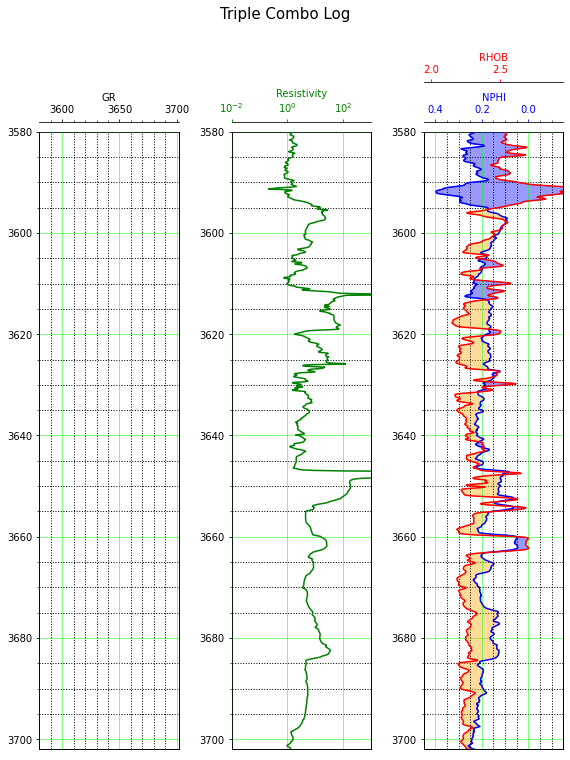

In [22]:
# adding optional variables like "sand_GR_line", "figsize", etc.
df = well
column_depth = 'DEPTH'
column_GR = 'GR'
column_resistivity ='RT'
column_NPHI ='NPHI'
column_RHOB ='RHOB'
min_depth =3580
max_depth =3702

max_GR = 120
min_resistivity = 0.01
triple_combo(df, column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB, min_depth, max_depth, min_depth, max_depth)

### Neutron Density Plot

We wish to identify the lithologies of each formation (whether sandstone, limestone, or dolomite) using ND plot. We will use function `ND_plot`.

In [23]:
# see help to find what visualization inputs are required
# identify which input is OBLIGATORY, which input is OPTIONAL
help(ND_plot)


Help on function ND_plot in module ND_plot:

ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by, figsize=(7, 7), scatter_size=50, scatter_alpha=0.5)
    Producing Neutron-Density (Cross)plot
    
    Input:
    
    denfl is your fluid density
    df is your dataframe
    column_nphi and column_rhob are the column name of your NPHI and RHOB
    column_hue is the column name that you want for the color of the points
      e.g. depth, vshale, formation labels, etc. 
    
    color_by depends on the column_hue that you're giving
      * if you're giving a continuous hue (numerical) like depth or vshale
        define color_by='continuous'
      * if you're giving a categorical hue (labels) like formation names
        define color_by='categorical'
    
    figsize, scatter_size, scatter_alpha are by default. You can also specify
      by yourselves.
    
    Output:
    
    3 lines. Blue is sandstone, black is limestone, red is dolomite
    Each line has dots representing 

Plot the NPHI and RHOB points differentiated by each formation names. (categorical)

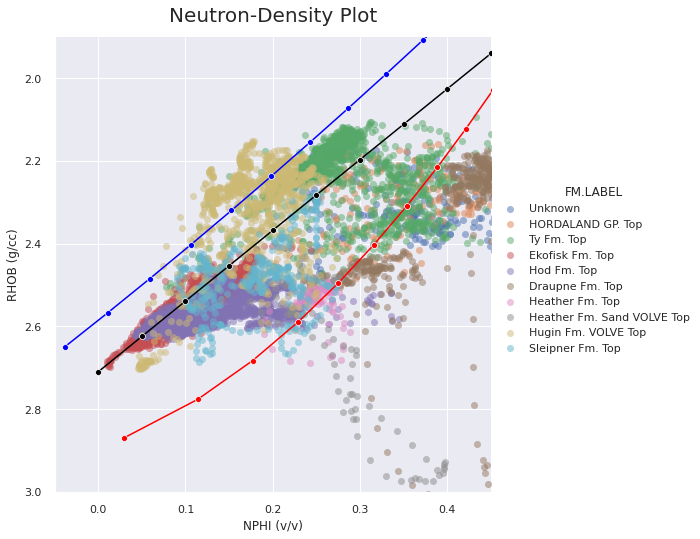

In [24]:
# use "ND_plot" to make a plot with colors based on formation names
denfl = 1
df = well
column_nphi = 'NPHI'
column_rhob = 'RHOB'
column_hue = 'FM.LABEL'
color_by = 'categorical'

ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by)

Plot NPHI and RHOB points differentiated by depths/other continuous variables

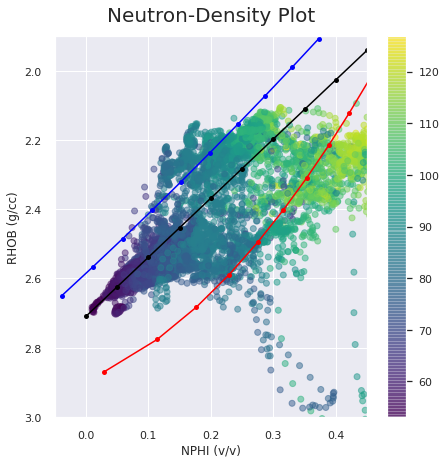

In [25]:
# use "ND_plot" to make a plot with colors based on continuous variables
denfl = 1
df = well
column_nphi = 'NPHI'
column_rhob = 'RHOB'
column_hue = 'DT'
color_by = 'continuous'

ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by)


## Petrophysical Calculation per Formation Top

You already have the data with formation labels. Next we will calculate new petrophysical variables PER FORMATION LABEL (only Heather and Hugin). 

> Sleipner will be your assignment.



First thing we need to do is to "mask the subset of dataframe in FM. LABEL column that contains each of the above names".

In [26]:
# list all formation labels using df['x'].unique()
well['FM.LABEL'].unique()

array(['Unknown', 'HORDALAND GP. Top', 'Ty Fm. Top', 'Ekofisk Fm. Top',
       'Hod Fm. Top', 'Draupne Fm. Top', 'Heather Fm. Top',
       'Heather Fm. Sand VOLVE Top', 'Hugin Fm. VOLVE Top',
       'Sleipner Fm. Top'], dtype=object)

In [27]:
# create masks for Heather and Hugin using string contains: str.contains.('...')
mask_heather = well['FM.LABEL'].str.contains('Heather')
mask_hugin = well['FM.LABEL'].str.contains('Hugin')
mask_sleipner = well['FM.LABEL'].str.contains('Sleipner')


# see inside the mask
mask_heather

0        False
1        False
2        False
3        False
4        False
         ...  
35730    False
35731    False
35732    False
35733    False
35734    False
Name: FM.LABEL, Length: 35735, dtype: bool

Now isolate Heather and Hugin into individual subsets of Dataframe, using the masks that we made before.

In [28]:
# create dataframe subsets of Heather and Hugin: df[mask]
heather = well[mask_heather]
hugin = well[mask_hugin]
sleipner = well[mask_sleipner]


# print the Heather dataframe
heather.head(10)

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FM.LABEL
33864,3574.9,2.555,2.519,2.478,2.525,8.5,8.625,0.064,88.002,164.521,94.931,0.250,6.900,1.650,1.738,1.743,2.512,1.881,19.947,1.881,1.743,1.881,Heather Fm. Top
33865,3575.0,2.585,2.508,2.477,2.527,8.5,8.648,0.069,88.042,164.488,94.299,0.252,6.823,1.615,1.733,1.778,2.515,1.960,19.948,1.959,1.778,1.960,Heather Fm. Top
33866,3575.1,2.585,2.504,2.484,2.520,8.5,8.648,0.070,87.941,163.483,90.815,0.254,6.810,1.638,1.732,1.773,2.514,1.914,19.949,1.914,1.773,1.914,Heather Fm. Top
33867,3575.2,2.562,2.504,2.494,2.511,8.5,8.672,0.067,87.723,162.337,90.686,0.253,6.825,1.685,1.732,1.700,2.510,1.775,19.897,1.775,1.700,1.775,Heather Fm. Top
33868,3575.3,2.532,2.505,2.505,2.503,8.5,8.672,0.062,87.380,161.030,92.615,0.248,6.841,1.588,1.665,1.654,2.507,1.766,19.845,1.766,1.654,1.766,Heather Fm. Top
33869,3575.4,2.503,2.507,2.520,2.497,8.5,8.672,0.059,87.718,159.862,94.925,0.243,6.857,1.598,1.663,1.640,2.507,1.750,19.793,1.750,1.640,1.750,Heather Fm. Top
33870,3575.5,2.486,2.513,2.535,2.493,8.5,8.672,0.057,88.017,159.196,93.937,0.240,6.873,1.598,1.663,1.638,2.510,1.745,19.846,1.745,1.638,1.745,Heather Fm. Top
33871,3575.6,2.484,2.520,2.546,2.494,8.5,8.672,0.059,88.229,159.178,94.390,0.238,6.883,1.597,1.663,1.636,2.516,1.741,19.899,1.741,1.636,1.741,Heather Fm. Top
33872,3575.7,2.491,2.526,2.548,2.500,8.5,8.672,0.061,88.498,160.078,94.287,0.238,6.891,1.568,1.655,1.642,2.520,1.768,19.952,1.768,1.642,1.768,Heather Fm. Top
33873,3575.8,2.495,2.528,2.540,2.506,8.5,8.672,0.060,88.737,161.405,92.588,0.239,6.895,1.549,1.646,1.646,2.520,1.783,19.953,1.783,1.646,1.783,Heather Fm. Top


We calculate new petrophysical outputs on these subsets. Based on petrophysical report, each formation has different variables like fluid density ($\rho_{fl}$), etc. The variables have been already listed below.

In [29]:
# List of individual variables of each formation (DO NOT CHANGE THESE VALUES)
#            Heath  Hugin   Sleip     
rho_ma    = [2.66,  2.65,   2.65]        
rho_fl    = [1,     0.9,    0.9]
gr_min    = [7,     7,      7]
gr_max    = [120,   150,    105]
A         = [0,     0.4,    0.4]  # regression coeff for PHID
B         = [0,     0.01,   0.01] # regression coeff for PHID

# from report, m of Hugin and Sleipner is calculated using specific formula (p. 15, 16)
# now we just assume both has the following values (taken from Asquith, p. 5)
# Hugin is "estimated" as consolidated sst, Sleipner as carbonates
m         = [2,     2,      2.14] 
a         = [1,     1,      1]
n         = [2,     2.45,   2.45]
# water resistivity, already extrapolated at depth from Rw @ 20C = 0.07 ohm-m
Rw        = [0.022, 0.022,  0.022] 

### 1. Calculate density porosity (PHID)

![image](https://user-images.githubusercontent.com/51282928/98511443-42241880-2297-11eb-94c2-c839ef7a35ba.png)

In [30]:
# calculate PHID for Heather and Hugin
rhob_heather, rhob_hugin, rhob_sleipner = heather['RHOB'], hugin['RHOB'], sleipner['RHOB']

phid_heather = (rho_ma[0] - rhob_heather) / (rho_ma[0] - rho_fl[0])
phid_hugin = (rho_ma[1] - rhob_heather) / (rho_ma[1] - rho_fl[1])
phid_sleipner = (rho_ma[2] - rhob_heather) / (rho_ma[2] - rho_fl[2])

phid_hugin



33864    0.078857
33865    0.077143
33866    0.077714
33867    0.080000
33868    0.081714
           ...   
34056    0.001714
34057    0.011429
34058    0.025143
34059    0.037714
34060    0.047429
Name: RHOB, Length: 197, dtype: float64

### 2. Calculate total porosity (PHIF)

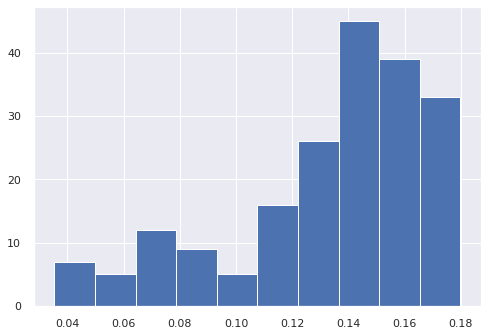

In [53]:
# calculate PHIF for Heather and Hugin
# phid + A * (NPHI - phid) + B
nphi_heather, nphi_hugin, nphi_sleipner = heather['NPHI'], hugin['NPHI'], sleipner['NPHI']

phif_heather = phid_heather + A[0] * (nphi_heather -phid_heather) + B[0]
phif_hugin = phid_hugin + A[1] * (nphi_heather -phid_hugin) + B[1]
phif_sleipner = phid_sleipner + A[2] * (nphi_sleipner -phid_sleipner) + B[2]

phif_hugin


# display histogram with bins 10
plt.hist(phif_hugin, bins=10)
plt.show()


Comment: some porosities are negative. This is normal because there are densities larger than calcite (> 2.71), while the measurement is in lst. unit check: `max(...)`

In [32]:
# maximum value of Heather's RHOB
max(rhob_heather)

2.975

### 3. Calculate shale volume (VSH)

![image](https://user-images.githubusercontent.com/51282928/98511687-ae9f1780-2297-11eb-9d96-9e50631ded03.png)

In [33]:
# calculate VSH for Heather and Hugin
gr_heather, gr_hugin, gr_sleipner = heather['GR'], hugin['GR'], sleipner['GR']

vsh_heather = (gr_heather - gr_min[0]) / (gr_max[0] - gr_min[0])
vsh_hugin = (gr_hugin - gr_min[0]) / (gr_max[0] - gr_min[0])
vsh_sleipner = (gr_sleipner - gr_min[0]) / (gr_max[0] - gr_min[0])

vsh_sleipner



# print summary stats: df.describe()
vsh_sleipner.describe()

count    600.000000
mean       0.459380
std        0.145057
min        0.132080
25%        0.342799
50%        0.494535
75%        0.550173
max        0.851956
Name: GR, dtype: float64

In [46]:
vsh_hugin.describe()


count    1074.000000
mean        0.230687
std         0.120326
min         0.013071
25%         0.140569
50%         0.232093
75%         0.304053
max         0.685602
Name: GR, dtype: float64

### 4. Calculate water saturation (SW)

![image](https://user-images.githubusercontent.com/51282928/98511817-ea39e180-2297-11eb-9919-50d9fb9dc4ea.png)



In [36]:
# calculate SW for Heather and Hugin
rt_heather, rt_hugin, rt_sleipner = heather['RT'], hugin['RT'], sleipner['RT']

sw_heather = ((a[0] * Rw[0]) / (phif_heather * rt_heather))**(1 / n[0])
sw_hugin = ((a[1] * Rw[1]) / (phif_hugin * rt_hugin))**(1 / n[1])
sw_sleipner =((a[2] * Rw[2]) / (phif_sleipner * rt_sleipner))**(1 / n[2])

sw_heather




33864    0.362193
33865    0.358470
33866    0.361508
33867    0.370357
33868    0.367641
           ...   
34056    0.706821
34057    0.438811
34058    0.307335
34059    0.253053
34060    0.228789
Length: 197, dtype: float64

In [37]:
sw_heather.describe()

count    155.000000
mean       0.509408
std        0.278306
min        0.228789
25%        0.395769
50%        0.444801
75%        0.505650
max        2.418432
dtype: float64

Comment: In Heather most SW result is larger than 1! 
However this is true because they're in fact water zone.
So, we can mask all SW values larger than 1, to be changed to 1

In [39]:
## create mask
mask_sw_heather = sw_heather <= 1



## change anyting larger than 1 with 1 using the mask
sw_heather = sw_heather[mask_sw_heather]

sw_heather




33864    0.362193
33865    0.358470
33866    0.361508
33867    0.370357
33868    0.367641
           ...   
34056    0.706821
34057    0.438811
34058    0.307335
34059    0.253053
34060    0.228789
Length: 148, dtype: float64

In [40]:
sw_heather.describe()

count    148.000000
mean       0.457721
std        0.096288
min        0.228789
25%        0.393667
50%        0.439114
75%        0.490111
max        0.889357
dtype: float64

### Calculate permeability (KLOGH)

The functions have been prepared for you. The equation used are from the report (p. 13), different for each formation.

![image](https://user-images.githubusercontent.com/51282928/98511897-089fdd00-2298-11eb-958b-3c2a05ce13e0.png)

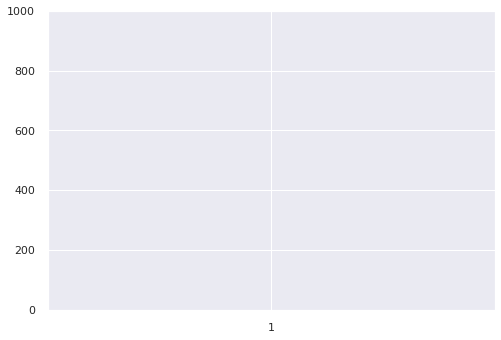

In [55]:
# There is no equation for Heather Fm., so Heather is not calculated
k_hugin = 10**(2 + 8 * phif_hugin - 9 * vsh_hugin)


# display boxplot
plt.boxplot(k_hugin)
plt.ylim(-1,1000)
plt.show()



Comment: there are lots of outliers of Hugin permeability

## Visualize calculations result

We have done with calculations, let's visualize them into logs. We will now practice using bare Matplotlib.

In [56]:
# visualize calculation result as derived logs (Hugin)








## End of the training!

Now we know how to:
* Read .LAS file using `lasio` and convert to Pandas dataframe
* Generate formation top labels from formation top file .CSV 
* Visualize well-logs
* Visualize triple combo
* Visualize Neutron-Density plot (with categorical and continuous variables)
* Making subsets of dataframes based on each formation name
* Compute petrophysical variables (PHIF, SW, VSH, K)
* Visualize the results

## Copyright

`formation-evaluation` repository that stores all the functions and data, and this notebook, are copyrights of Yohanes Nuwara (2020). This notebook is contained in [this repository](https://github.com/yohanesnuwara/python-bootcamp-for-geoengineers) You may freely distribute for self-study and tutorials, but you will consider the authorship of all the codes written here. 

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.